In [1]:
import sys
print(sys.version)
%matplotlib inline
%run -i ~/Python/pjr3

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]
pjr3.py complete


In [2]:
print ("two vals of pi", np.pi, pi)

two vals of pi 3.141592653589793 3.141592653589793


$$
f(t) = \Sigma_i (a_i cos({2\pi\over i} t) + b_i sin({2\pi\over i} t)))
$$


In [3]:
findNiceContours?

Signature: findNiceContours(data, nlevs=None, rmClev=None, sym=None, verbose=None)
Docstring:
Find Nice Contours
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
nlevs = approximate number of contour levels to return (default 10)
rmClev = if defined delete the contour level near this value
sym = if defined make the contour intervals symmetric about zero
verbose = if defined, print out some info to help debug
File:      ~/Python/pjr3.py
Type:      function


In [4]:
plotZMf?

Signature:
plotZMf(
    data,
    x,
    y,
    plotOpt=None,
    modelLevels=None,
    surfacePressure=None,
    axesa=None,
    fig=None,
)
Docstring:
Create a zonal mean contour plot of one variable
axesa = the axes that we make the plot on 
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
x = 1d numpy array of latitude
y = 1d numpy array of pressures (or pseudo pressure (like eta))
plotOpt is a optional dictionary with plotting options:
  'scale_factor': multiply values with this factor before plotting
  'units': a units label for the colorbar
  'clevs': use list of values as contour intervals
  'cmap': the color map to use
  'cabv': the above color
  'cbel': the below color
  'colorbar': location of colorbar ('bot','top','left','right','None')
  'rmClev': contour level to delete; frequently Zero, see findNiceContours
  'title': a title for the plot
  'ybot': if present, the pressure at the plot bottom
  'ytop': if present, the pressure at the to

In [5]:
from nco import Nco

In [6]:
# identify a model case directory, and a directory to store remapped climo files
import os
#host = os.environ.get('HOST')
#print(host)
#print(os.environ)
import platform
host = platform.node()
print(host)
filename = os.path.expanduser('~/my_folder/output.txt')
if ('corix' in host):
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.*-06.nc'
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.*.nc'
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.0049-06.nc'
else:
    indir = os.path.expanduser('~/NetCDF_Files/vd05_ANN_climo.nc')
    indir = os.path.expanduser('/pic/projects/sooty2/d3j082/for_phil/')
print(indir)
#print('exists',os.path.exists(indir))
#fullstring = indir + 'wrfout_d01_2010-06-04_23:00:00'# + 'wrfout*'
fullstring = indir + 'wrfout_d01_2010-06-04_11:00:00'# + 'wrfout*'
print('xxx',fullstring)
DS = xr.open_mfdataset(fullstring,engine='netcdf4') # .chunk({'time': 20})
print(DS)
#weights = DS.area
#weights.name = 'weights'
#print(weights)
#print(weights.sum(),4.*pi)
#Var = DS.FSNT.isel(time=0)
Var = DS.HGT.squeeze()
print('Var',Var)
print(Var.shape)
#Varwt = Var.weighted(weights)
#print(Varwt)
#Varmean = Varwt.mean('ncol')
#print(Varmean)
#Varm2 = Var.weighted(weights).mean('ncol')
#print('area weighted mean', Varm2.values)

sooty.pnl.gov
/pic/projects/sooty2/d3j082/for_phil/
xxx /pic/projects/sooty2/d3j082/for_phil/wrfout_d01_2010-06-04_11:00:00
<xarray.Dataset>
Dimensions:              (Time: 1, bottom_top: 64, bottom_top_stag: 65, dust_erosion_dimension: 3, emissions_zdim: 8, klevs_for_dvel: 1, soil_layers_stag: 4, south_north: 279, south_north_stag: 280, west_east: 279, west_east_stag: 280)
Coordinates:
    XLAT                 (Time, south_north, west_east) float32 dask.array<chunksize=(1, 279, 279), meta=np.ndarray>
    XLONG                (Time, south_north, west_east) float32 dask.array<chunksize=(1, 279, 279), meta=np.ndarray>
    XLAT_U               (Time, south_north, west_east_stag) float32 dask.array<chunksize=(1, 279, 280), meta=np.ndarray>
    XLONG_U              (Time, south_north, west_east_stag) float32 dask.array<chunksize=(1, 279, 280), meta=np.ndarray>
    XLAT_V               (Time, south_north_stag, west_east) float32 dask.array<chunksize=(1, 280, 279), meta=np.ndarray>
    XLONG_

range -116.980865 3752.9326


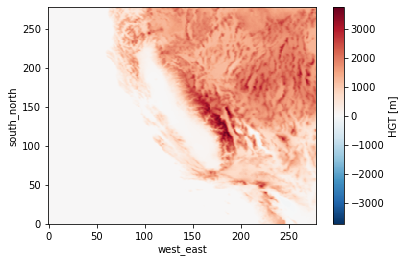

In [7]:
#print(Varm2.values)
print('range',Var.min().values,Var.max().values)
Var.plot()

aaa -127.51396 -113.48604
bbb 32.219883 42.65326


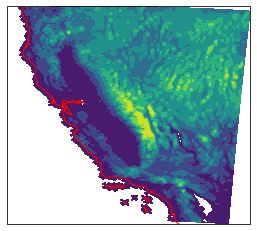

In [8]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='red')
lon = Var['XLONG']
lat = Var['XLAT']
print('aaa',lon.min().values,lon.max().values)
print('bbb',lat.min().values,lat.max().values)
dd = Var.values
clevs = findNiceContours(dd,nlevs=6)
ax.contourf(lon, lat, dd, levels=clevs, transform=ccrs.PlateCarree())

plt.show()

In [9]:
def plot_wrf_sfcfield (DS):
    """plot a surface field (usually HGT) along with state boundaries and coastlines
        DS: an xarray dataset
    """
    
    varname = 'HGT'
    #varname = 'PSFC'
    Var = DS[varname].squeeze()
    #print(Var)

    print('Var range', Var.min().values,Var.max().values)
    lon = Var['XLONG']
    lat = Var['XLAT']

    dd = np.float64(Var.values)
    # figure out reasonable contours at provided resolution
    clevs = findNiceContours(np.array([0.,5600.],dtype=np.float64),20)
    clev1 = findNiceContours(np.array([0.,2000.],dtype=np.float64),10)
    #print('clev1',clev1.dtype,clev1)
    clev2 = findNiceContours(np.array([2001.,5000.],dtype=np.float64),10)
    #print('clev2',clev2.dtype,clev2)
    clevs = np.append(clev1,clev2[1:])
    clevs[0] = 0

    # auto choose the contours
    clevs = findNiceContours(dd,22)

    # manually set contours
    #clevs = np.array([-0.01,100., 500.,1000.,1500.,2000.,3000.,5000.])
    #clevs = findNiceContours(np.array([60000.,102000.]),20)
    #clevs = findNiceContours(np.array([-100.,2000.]),20)
    #clevs = findNiceContours(np.array([100000.,102000.]),20)

    print('clevs',clevs)
    cmap = plt.cm.Blues
    #cmap = mpl.cm.viridis
    #cmap = mpl.cm.gist_ncar_r
    cmap = cmocean.cm.topo

    bounds = clevs
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    ax.set_global()
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
    #ax.set_extent([-120, -100, 20, 50], crs=ccrs.PlateCarree())

    # large zorder is on top
    # draw field as filled contours
    contour = ax.contourf(lon, lat, dd, levels=clevs, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)
    contour.cmap.set_over('white')
    contour.cmap.set_under('black')
    contour = ax.contourf(lon, lat, dd, levels=[clevs[0]-(clevs[1]-clevs[0])*10.,clevs[0]], cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)
    contour = ax.contourf(lon, lat, dd, levels=[clevs[-1],clevs[-1]+(clevs[-1]-clevs[-2])*10.], cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)

    #ax.pcolormesh(lon, lat, dd, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)
    #ax.coastlines(color='red', linewidth=1.7,zorder=2, alpha=1)
    #ax.contour(lon, lat, dd, levels=np.array([0.]), linewidths=1., colors="orange", transform=ccrs.PlateCarree(),zorder=3)

    gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None,zorder=4)
    gl.n_steps = 90
    #gl.n_steps = 3
    #
    #ax.gridlines()

    # Draw states.                   
    states = NaturalEarthFeature(category='cultural', scale='50m',
    facecolor='none', name='admin_1_states_provinces_shp') # name='admin_1_states_provinces_shp')

    _ = ax.add_feature(states, edgecolor='red',linewidth=1.5, alpha=1, zorder=1)
    #
    
    # put a marker at Los Angeles
    lalon = -118.25
    lalat = 34.05
    ax.plot(lalon,lalat, color='red', marker='*', linestyle='dashed',transform=ccrs.PlateCarree(),
        linewidth=2, markersize=10, zorder=10)

    # Add colorbar to plot
    #cb = pyplot.colorbar(
    #    pl, orientation='horizontal',
    #    label='%s (%s)'%(data.long_name, data.units), pad=0.05
    #)

    cb = figure.colorbar(
        cmap2,
        orientation='horizontal',
        label='%s (%s)'%(Var.description, Var.units), pad=0.05
    )

    if False: '''
    # Add markers to plot for GLL centers
    pl = ax.plot(
        fix_lon(ds_grid['grid_center_lon'].values),
        ds_grid['grid_center_lat'].values,
        marker=',', markersize=0.5,
        MarkerFaceColor='black', MarkerEdgeColor='black',
        linestyle='none',
    )
    '''
        
    return

def plot_wrf_field(Var, clevs=None, cmap=None, almin=None, almax=None, alpha=None, zorder=None):
    """"
    plot a wrf field
    """
    lon = Var['XLONG']
    lat = Var['XLAT']
    dd = Var.values
    #print('dd',type(dd))
    #print('ddmin',np.nanmin(dd))
    ddrange = np.array([np.nanmin(dd),np.nanmax(dd)])
    print('ddrange',ddrange)

    if zorder is None:
        zorder = 3
        
    if clevs is None:
        print('auto clevs')
        clevs = findNiceContours(dd,nlevs=22)
        clevs = clevs[14:]
    #clevs = np.array([0.001,0.002,0.005,0.01,0.02,0.05,0.1])
    bounds = clevs
    if cmap is None:
        print('auto cmap')
        #cmap = cmocean.cm.topo
        cmap = plt.cm.Blues_r
    cmap = cmap.copy()
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    #clevs[0]= 0.007
    #clevs[-1] =0.275
    print('clevs',clevs)
    if almin is None and almax is None:
        print('allatonce')
        if alpha is None:
            alpha = 1.
        contour = ax.contourf(lon, lat, dd, levels=clevs, alpha=alpha, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), antialiased=True)
        for c in contour.collections:
            c.set_edgecolor("none")
    else:
        print('oneatatime')
        for levind in range(len(clevs)-1):
            cl2 = clevs[levind:levind+2]
            #print ('xxx',clevs.dtype, cl2.dtype)
            sf = float(levind)/len(clevs)
            alphap = almin + sf*(almax-almin)
            alpha = np.max([0.,np.min([1.,alphap])])
            #print ("levind",levind, cl2, alpha)
            contour = ax.contourf(lon, lat, dd, levels=cl2, alpha=alpha, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=zorder, antialiased=True)
            # try to eliminate edge effects on contours
            for c in contour.collections:
                c.set_edgecolor("none")
                

    #contour.cmap.set_over('white')
    #contour.cmap.set_under('black')
    #clb = np.array([clevs[0]-(clevs[1]-clevs[0])*20.,clevs[0]])
    clb = np.array([np.finfo(type(clevs[0])).min,clevs[0]])
    #print('clb',clb)
    #clt = np.array([clevs[-1],clevs[-1]+(clevs[-1]-clevs[-2])*20.]
    clt = np.array([clevs[-1],np.finfo(type(clevs[0])).max])
    #print('clt',clt)
    contour = ax.contourf(lon, lat, dd, levels=clb, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=3, antialiased=True)
    contour = ax.contourf(lon, lat, dd, levels=clt, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=3, antialiased=True)
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
    
    # try to eliminate edge effects on contours
    for c in contour.collections:
        c.set_edgecolor("none")

    cb = figure.colorbar(
        cmap2,
        orientation='horizontal',
        pad=0.05
    )
    
    cb.set_label(label='%s (%s)'%(Var.description, Var.units), size=18, weight='bold')
    cb.ax.tick_params(labelsize=16) 

    return;

def make_Z3m(DS):
    """create a field called Z3M which is the layer midpoint height above the surface """
    PH = DS["PH"].squeeze()
    PHB = DS["PHB"].squeeze()
    HGT = DS["HGT"].squeeze()
    maxindex = HGT.values.argmax()
    #print ("maxindex",maxindex, HGT.values.max())
    i,j = np.unravel_index(maxindex, HGT.values.shape)
    #print("i,j",i,j, HGT.values[i,j])
    #print("PH",PH[0:2,i,j].values/9.8)
    #print("PHB",PHB[0:2,i,j].values/9.8)
    Z3 = (PH + PHB)/9.8 - HGT # height above surface
    Z3.attrs['units'] = 'm'
    Z3.attrs['description'] = 'interface height above surface'
    Z3m = (Z3[0:-1]+Z3[1:np.shape(Z3)[0]+1])/2.
    #print('Z3m in make_Z3m', Z3m[:,i,j].values,Z3[:,i,j].values)
    #print("HGT", HGT[i,j].values)
    #print("Z3",Z3[:,i,j].values)
    #print("Z3m",Z3m[:,i,j].values)
    #print('Z3m inside range', Z3m.values.min(), Z3m.values.max())
    #print('make_Z3M done')
    Z3mr = Z3m.rename()
    return Z3mr;




xxx /pic/projects/sooty2/d3j082/for_phil/wrfout_d01_2010-06-28_23:00:00
clevs [   0.  200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2500.
 3000. 3500. 4000. 4500. 5000.]
ddrange [-116.980865 3752.9326  ]
clevs [   0.  200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2500.
 3000. 3500. 4000. 4500. 5000.]
allatonce
ddrange [0.04113948 0.4839368 ]
clevs [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29]
oneatatime
plotfile AOD_calnav.pdf


<Figure size 3900x3900 with 0 Axes>

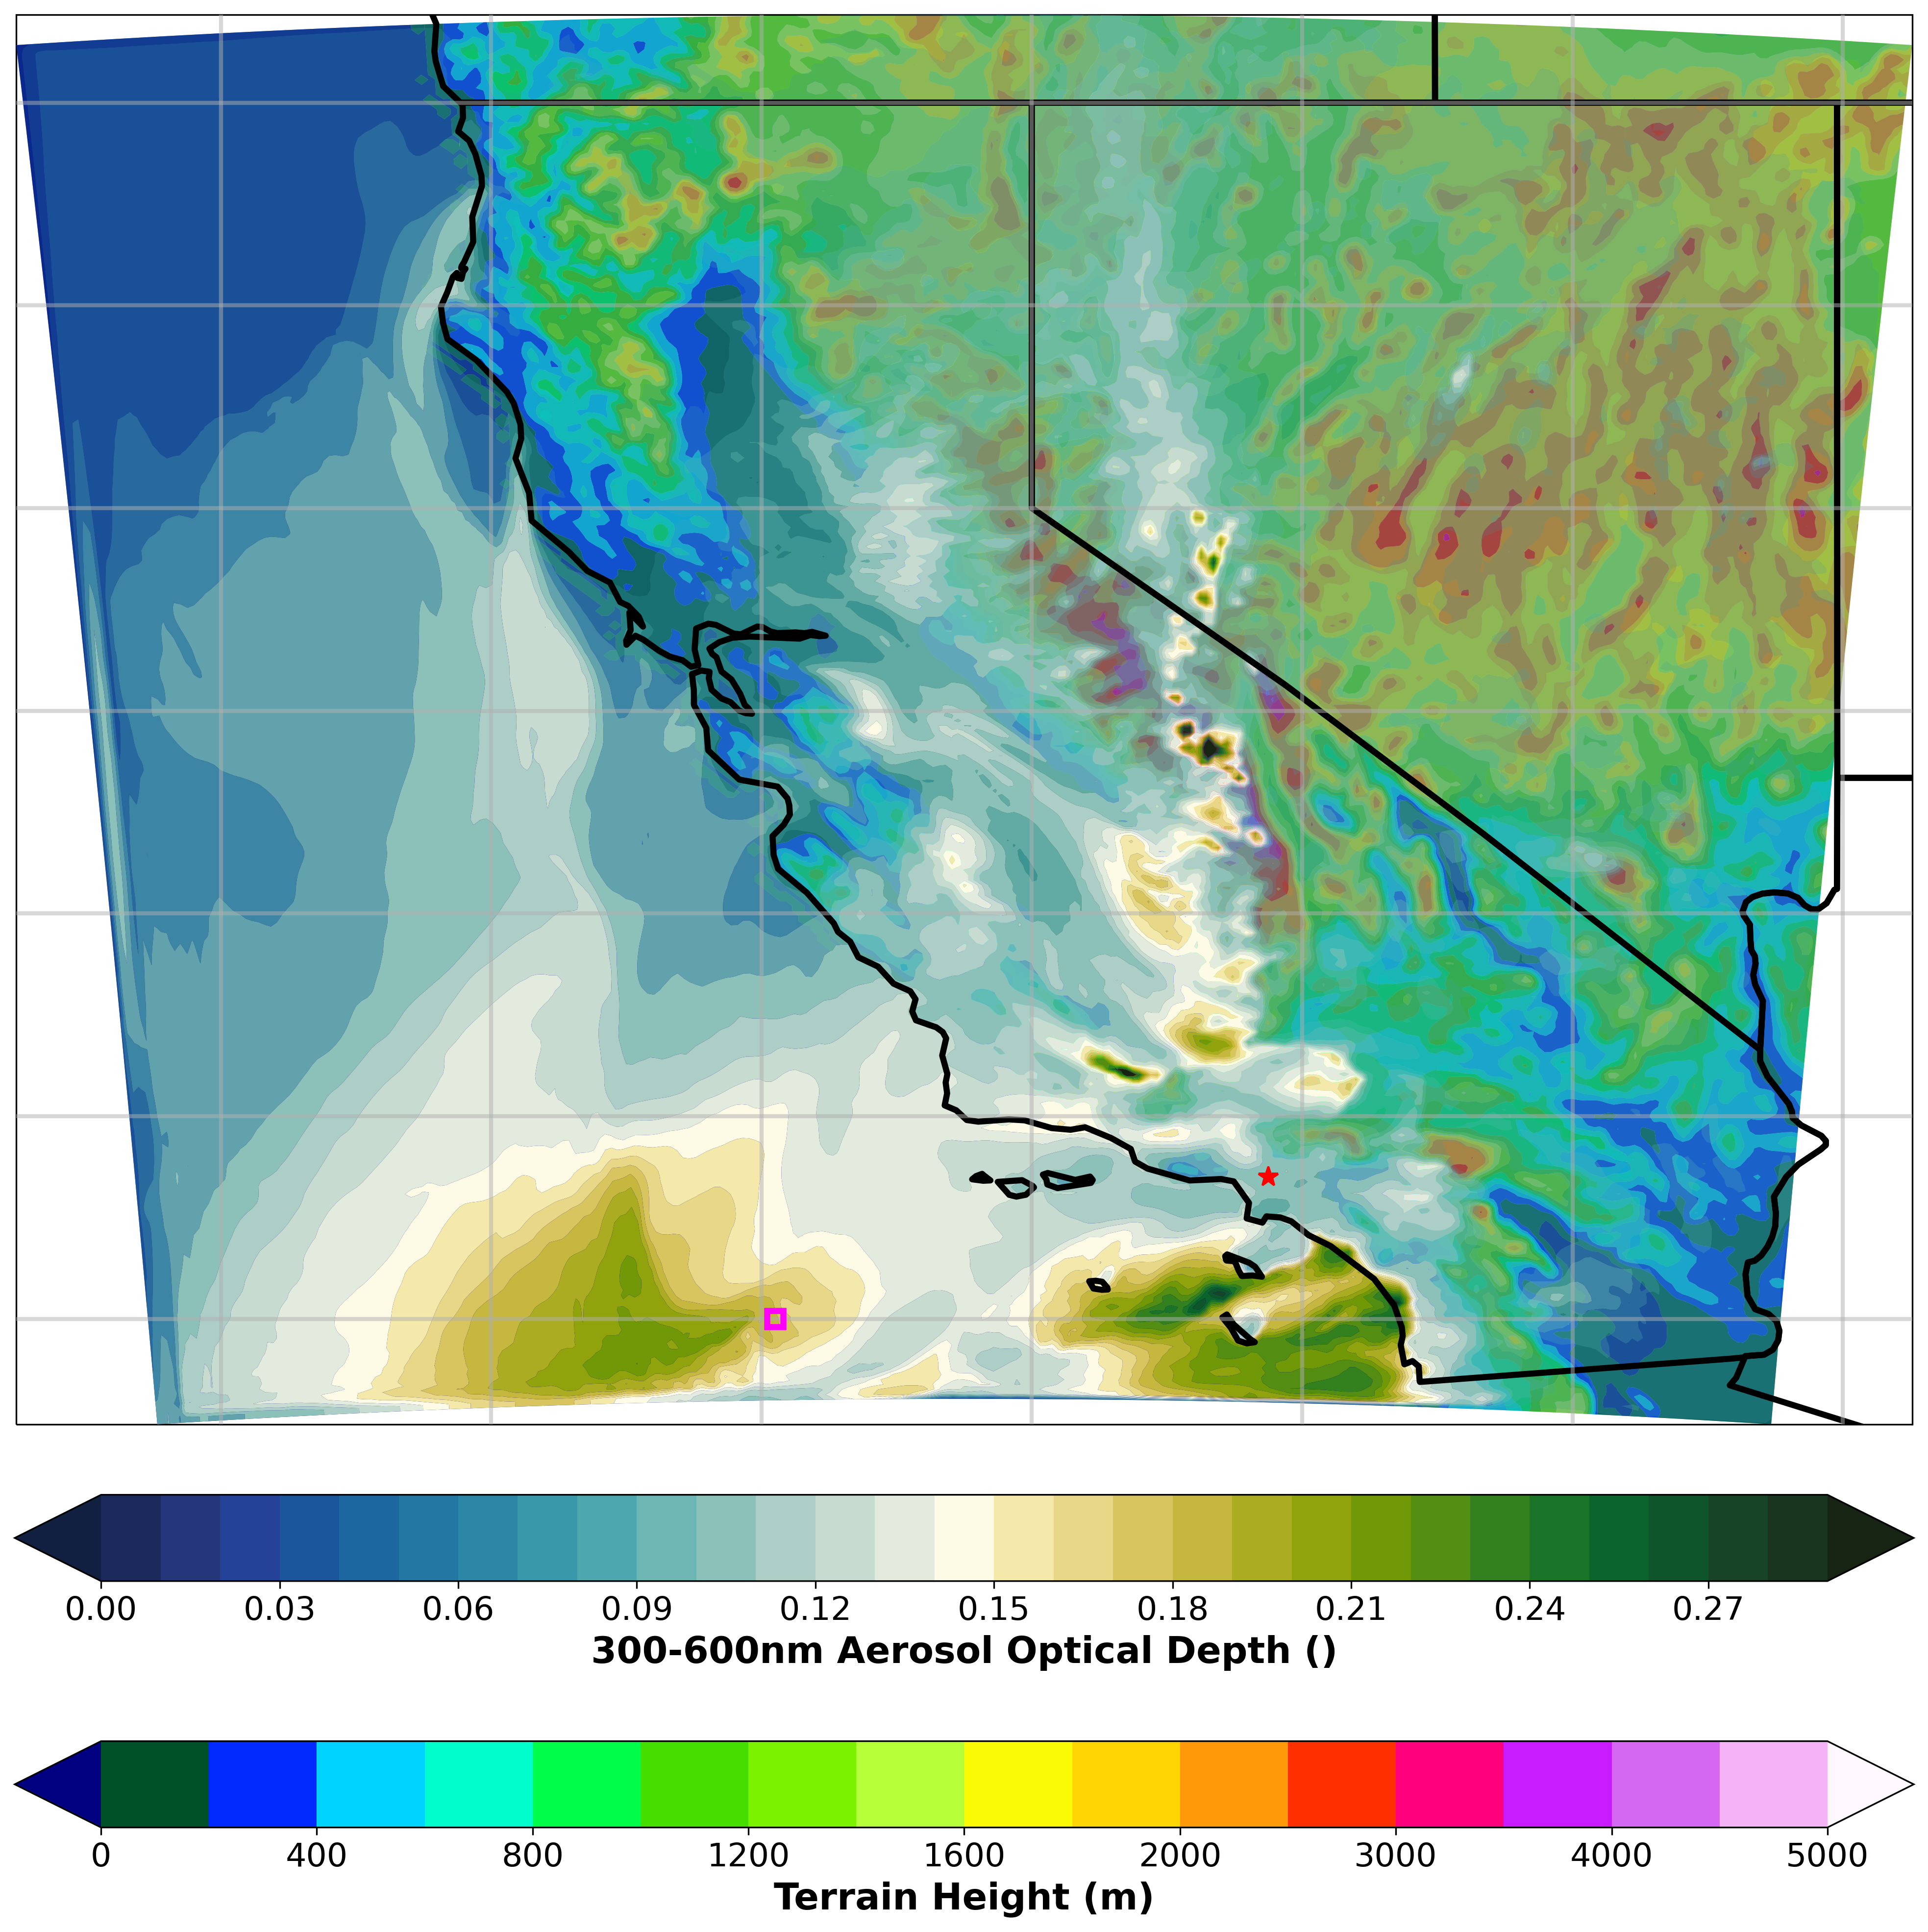

In [20]:
from netCDF4 import Dataset
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
import cmocean
import matplotlib.patches as mpatches

#fullstring = indir + 'wrfout_d01_2010-06-04_23:00:00'# + 'wrfout*'
#fullstring = indir + 'wrfout_d01_2010-06-04_11:00:00'# + 'wrfout*'
fullstring = indir + 'wrfout_d01_2010-06-12_23:00:00'# + 'wrfout*'
#fullstring = indir + 'wrfout_d01_2010-06-12_11:00:00'# + 'wrfout*'
#fullstring = indir + 'wrfout_d01_2010-06-15_23:00:00'# + 'wrfout*'
#fullstring = indir + 'wrfout_d01_2010-06-15_11:00:00'# + 'wrfout*'
fullstring = indir + 'wrfout_d01_2010-06-17_23:00:00'# + 'wrfout*'
#fullstring = indir + 'wrfout_d01_2010-06-17_11:00:00'# + 'wrfout*'
fullstring = indir + 'wrfout_d01_2010-06-28_23:00:00'# + 'wrfout*'
#fullstring = indir + 'wrfout_d01_2010-06-28_11:00:00'# + 'wrfout*'


print('xxx',fullstring)
DS = xr.open_mfdataset(fullstring,engine='netcdf4') # .chunk({'time': 20})
#print(DS)

with xr.set_options(keep_attrs=True):
    Var = DS["TAUAER1"].squeeze()
    vdimi = Var.squeeze().dims.index('bottom_top')
    #Var3D = (DS["TAUAER1"]+DS["TAUAER2"]+DS["TAUAER3"]+DS["TAUAER4"])/4.
    Var3D = (DS["TAUAER1"]+DS["TAUAER2"]+DS["TAUAER3"])/3.
    #Var3D = DS["TAUAER1"]
    #Var3D = DS["TAUAER3"]
    Var3D = Var3D.squeeze()
    VarAOD = Var3D.sum(axis=vdimi)

    VarAOD.attrs['description'] = '300-600nm Aerosol Optical Depth'
    #VarAOD.attrs['description'] = '600nm AOD'
    VarAOD.attrs['units'] = ''
    #print(VarAOD)

#map_proj = ccrs.Orthographic(central_latitude=-45.0, central_longitude=-45.0)
map_proj = ccrs.NearsidePerspective(central_longitude=-120.0, central_latitude=40.0, satellite_height=3.5785831e7*0.005)
#map_proj = ccrs.Mollweide()
map_proj = ccrs.PlateCarree()

if hasattr(map_proj,'_threshold'):
    map_proj._threshold /= 100.  # the default values is bad, users need to set them manually


# 3D array of layer heights (above surface)
Z3m = make_Z3m(DS)


dpi=2400
dpi=300
plt.figure(figsize=(13,13),dpi=dpi)

# Make plot
figure, ax = plt.subplots(
    1, 1,figsize=(13,13),dpi=dpi,
    constrained_layout=True,
    #subplot_kw=dict(projection=crs.Orthographic(central_longitude=-100))
    subplot_kw=dict(projection=map_proj)
    )

#xxx
varname = 'HGT'
Var = DS[varname].squeeze()

dd = np.float64(Var.values)
clevs = findNiceContours(np.array([0.,5600.],dtype=np.float64),20)
clev1 = findNiceContours(np.array([0.,2000.],dtype=np.float64),10)
#print('clev1',clev1.dtype,clev1)
clev2 = findNiceContours(np.array([2001.,5000.],dtype=np.float64),10)
#print('clev2',clev2.dtype,clev2)
clevs = np.append(clev1,clev2[1:])
#clevs = findNiceContours(dd,nlevs=20)
clevs[0] = 0
#clevs = findNiceContours(dd,22)
#print('eee',clevs.dtype)
#clevs = np.array([-0.01,100., 500.,1000.,1500.,2000.,3000.,5000.])
#clevs = findNiceContours(np.array([60000.,102000.]),20)
#clevs = findNiceContours(np.array([-100.,2000.]),20)
#clevs = findNiceContours(np.array([100000.,102000.]),20)

print('clevs',clevs)
cmap = plt.cm.Blues
#cmap = mpl.cm.viridis
cmap = mpl.cm.gist_ncar




plot_wrf_field(Var,clevs=clevs, cmap=cmap, alpha=1., zorder=2)


dd = VarAOD.values
clevs = findNiceContours(dd,nlevs=60)
clevs = np.arange(0.,0.3, 0.01)
#print('AOD clevs',clevs)
cmap = cmocean.cm.delta

plot_wrf_field(VarAOD,cmap=cmap, clevs=clevs, almin=0.0, almax=3.0, zorder=3)


#lon1 = Var['XLONG'].values
#lat1 = Var['XLAT'].values
#print ('fff', lon1[0,0],lat1[0,0], lon[0,0],lat[0,0])
#clb = np.array([clevs[0]-(clevs[1]-clevs[0])*10.,clevs[0]])
#print('clb',clb)
#clt = np.array([clevs[-1],clevs[-1]+(clevs[-1]-clevs[-2])*10.])
#print('clt',clt)

#ax.contour(lon, lat, dd, levels=clb, colors='red',  transform=ccrs.PlateCarree(),zorder=3, antialiased=True)
#ax.contour(lon, lat, dd, levels=clt,  colors='green', transform=ccrs.PlateCarree(),zorder=3, antialiased=True)
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None, zorder=5, alpha=0.5, linewidth=2)
gl.n_steps = 90
#gl.n_steps = 3
#
#ax.gridlines()
# Draw states.                   
states = NaturalEarthFeature(category='cultural', scale='50m',
facecolor='none', name='admin_1_states_provinces_shp') # name='admin_1_states_provinces_shp')

_ = ax.add_feature(states, edgecolor='black',linewidth=3., alpha=1, zorder=4)

lalon = -118.25
lalat = 34.05
ax.plot(lalon,lalat, color='red', marker='*', linestyle='dashed',transform=ccrs.PlateCarree(),
linewidth=2, markersize=10, zorder=10)

clat = 33.
clon = -122.
slat = clat-0.06
nlat = clat+0.06
wlon = clon-0.06
elon = clon+0.06

lat2_corners = np.array([slat,  slat, nlat, nlat])
lon2_corners = np.array([ wlon, elon, elon, wlon]) + 0.1 # offset from gridline for clarity

poly2_corners = np.zeros((len(lat2_corners), 2), np.float64)
poly2_corners[:,0] = lon2_corners
poly2_corners[:,1] = lat2_corners

poly = mpatches.Polygon(poly2_corners, closed=True, ec='magenta', fill=True, lw=3, fc="none", zorder=6, transform=ccrs.PlateCarree(),alpha=1.)

ax.add_patch(poly)


plotfile = 'AOD_calnav.pdf'
figure.savefig(plotfile, bbox_inches='tight',dpi=dpi)
print('plotfile',plotfile)

plt.show()


In [ ]:
# explore shadowing following https://github.com/koldunovn/FESOM_SST_shaded_by_U/blob/main/FESOM_SST_shaded_by_U.ipynb
fig, ax = plt.subplots(
            1,
            2,
            constrained_layout=True,
            figsize=(10,10),
        )
#ax.imshow(np.flipud(sst.sst.values), cmap=cm.RdBu_r,  vmin=12, vmax=24)
#ax.imshow(np.flipud(v.v_surf.values), alpha=0.3, cmap=cm.gray, vmin=-.3, vmax=0.3)
ax[0].imshow(np.flipud(Var.values), cmap=mpl.cm.RdBu_r,  vmin=0, vmax=6.)
ax[1].imshow(np.flipud(Var.values), cmap=mpl.cm.RdBu_r,  vmin=0, vmax=6.)
ax[1].imshow(np.flipud(Varu.values), alpha=0.2, cmap=mpl.cm.gray, vmin=-10., vmax=30.)


ax[0].axis('off');
ax[1].axis('off')

In [ ]:
from netCDF4 import Dataset
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
import cmocean

ncfile = Dataset(fullstring)
p = getvar(ncfile, "pressure")
z = getvar(ncfile, "z", units="dm")
#print('z info', z)
wspd = getvar(ncfile, "wspd_wdir", units="kts")[0,:]
#print ("wspd",wspd)
Var = interplevel(wspd, p, 500)
#print ("Var",Var)
#Var3D = DS["T"].squeeze()
#Var3D = DS["TOTOA_A01"]+DS["TOTOA_A02"]+DS["TOTOA_A03"]+DS["TOTOA_A04"]+DS["TOTOA_A05"]+DS["TOTOA_A06"] # Total OA
#Var3D = DS["so4_a01"]+DS["so4_a02"]+DS["so4_a03"]+DS["so4_a04"]+DS["so4_a05"]+DS["so4_a06"] #sulfate
Var3D = DS["oin_a01"]+DS["oin_a02"]+DS["oin_a03"]+DS["oin_a04"]+DS["oin_a05"]+DS["oin_a06"] # other inorganic
Var3D = Var3D.squeeze()
#print("Var3D",Var3D)
#Var = interplevel(Var3D,p,850.)
#Var = interplevel(Var3D,z,80.)
#print("Var",Var)

PH = DS["PH"].squeeze()
PHB = DS["PHB"].squeeze()
HGT = DS["HGT"].squeeze()
maxindex = HGT.values.argmax()
#print ("maxindex",maxindex)
i,j = np.unravel_index(maxindex, HGT.values.shape)
#print("i,j",i,j)
#print("PH",PH[0:2,i,j].values/9.8)
#print("PHB",PHB[0:2,i,j].values/9.8)
Z3 = (PH + PHB)/9.8 - HGT # height above surface
Z3.attrs['units'] = 'm'
Z3.attrs['description'] = 'interface height above surface'
Z3m = (Z3[0:-1]+Z3[1:np.shape(Z3)[0]+1])/2.
#print("HGT", HGT[i,j].values)
#print("Z3",Z3[:,i,j].values)
#print("Z3m",Z3m[:,i,j].values)
Var = interplevel(Var3D,Z3m,80.)
#print("Var",Var)

#map_proj = ccrs.Orthographic(central_latitude=-45.0, central_longitude=-45.0)
map_proj = ccrs.NearsidePerspective(central_longitude=-120.0, central_latitude=40.0, satellite_height=3.5785831e7*0.005)
#map_proj = ccrs.Mollweide()
map_proj = ccrs.PlateCarree()

if hasattr(map_proj,'_threshold'):
    map_proj._threshold /= 100.  # the default values is bad, users need to set them manually


dpi = 300
figure, ax = plt.subplots(
    1, 1,figsize=(3,3),dpi=dpi,
    #subplot_kw=dict(projection=crs.Orthographic(central_longitude=-100))
    subplot_kw=dict(projection=map_proj)
)
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='red',alpha=1.0,zorder=0)
lon = Var['XLONG']
lat = Var['XLAT']
dd = Var.values
#print('dd',type(dd))
#print('ddmin',np.nanmin(dd))
#ddrange = np.array([dd.nanmin(),dd.nanmax()])
#print('ddrange',ddrange)
clevs = findNiceContours(dd,nlevs=22)
clevs = clevs[4:]
#clevs = np.array([0.001,0.002,0.005,0.01,0.02,0.05,0.1])
bounds = clevs
cmap = cmocean.cm.topo
cmap = plt.cm.Blues_r
cmap = mpl.cm.get_cmap("Blues_r").copy()
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

#clevs[0]= 0.007
#clevs[-1] =0.275
print('clevs',clevs)
#contour = ax.contourf(lon, lat, dd, levels=clevs, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

for levind in range(len(clevs)-1):
    cl2 = clevs[levind:levind+2]
    #print ('xxx',clevs.dtype, cl2.dtype)
    sf = float(levind)/len(clevs)
    almin = 0.3
    almax = 1.0
    alpha = almin + sf*(almax-almin)
    alpha = 1.0
    #print ("levind",levind, cl2, alpha)
    contour = ax.contourf(lon, lat, dd, levels=cl2, alpha=alpha, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=3, antialiased=True)

contour.cmap.set_over('magenta')
contour.cmap.set_under('black')
#contour = ax.contourf(lon, lat, dd, levels=[-1.e3,clevs[0]], cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)
#contour = ax.contourf(lon, lat, dd, levels=[clevs[-1],100.e3], cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)
clb = np.array([clevs[0]-(clevs[1]-clevs[0])*10.,clevs[0]])
print('clb',clb)
clt = np.array([clevs[-1],clevs[-1]+(clevs[-1]-clevs[-2])*10.])
print('clt',clt)
#ax.contourf(lon, lat, dd, levels=clb, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)
contour = ax.contourf(lon, lat, dd, levels=clt, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=3, antialiased=True)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

cb = figure.colorbar(
    cmap2,
    orientation='horizontal',
    #label='%s (%s)'%(Var.description, Var.units), 
    pad=0.05
)
plotfile = 'calnav.pdf'
figure.savefig(plotfile)
print('plotfile',plotfile)

plt.show()

In [ ]:
# from matplotlib import pyplot
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
import cmocean


#map_proj = ccrs.Orthographic(central_latitude=-45.0, central_longitude=-45.0)
map_proj = ccrs.NearsidePerspective(central_longitude=-120.0, central_latitude=40.0, satellite_height=3.5785831e7*0.005)
#map_proj = ccrs.Mollweide()
map_proj = ccrs.PlateCarree()

if hasattr(map_proj,'_threshold'):
    map_proj._threshold /= 100.  # the default values is bad, users need to set them manually



dpi=2400
dpi=300
plt.figure(figsize=(13,13),dpi=dpi)

# Make plot
figure, ax = plt.subplots(
    1, 1,figsize=(13,13),dpi=dpi,
    #subplot_kw=dict(projection=crs.Orthographic(central_longitude=-100))
    subplot_kw=dict(projection=map_proj)
)


varname = 'HGT'
#varname = 'PSFC'
Var = DS[varname].squeeze()
#print(Var)

print('Var range', Var.min().values,Var.max().values)
lon = Var['XLONG']
lat = Var['XLAT']

dd = np.float64(Var.values)
print('dddd',dd.dtype)
clevs = findNiceContours(np.array([0.,5600.],dtype=np.float64),20)
clev1 = findNiceContours(np.array([0.,2000.],dtype=np.float64),10)
print('clev1',clev1.dtype,clev1)
clev2 = findNiceContours(np.array([2001.,5000.],dtype=np.float64),10)
print('clev2',clev2.dtype,clev2)
clevs = np.append(clev1,clev2[1:])
#clevs = findNiceContours(dd,nlevs=20)
clevs[0] = 0
clevs = findNiceContours(dd,22)
print('eee',clevs.dtype)
#clevs = np.array([-0.01,100., 500.,1000.,1500.,2000.,3000.,5000.])
#clevs = findNiceContours(np.array([60000.,102000.]),20)
#clevs = findNiceContours(np.array([-100.,2000.]),20)
#clevs = findNiceContours(np.array([100000.,102000.]),20)


print('clevs',clevs)
cmap = plt.cm.Blues
#cmap = mpl.cm.viridis
#cmap = mpl.cm.gist_ncar_r
cmap = cmocean.cm.topo

bounds = clevs
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

ax.set_global()
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
#ax.set_extent([-120, -100, 20, 50], crs=ccrs.PlateCarree())

# large zorder is on top
contour = ax.contourf(lon, lat, dd, levels=clevs, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)
contour.cmap.set_over('white')
contour.cmap.set_under('black')
contour = ax.contourf(lon, lat, dd, levels=[clevs[0]-(clevs[1]-clevs[0])*10.,clevs[0]], cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)
contour = ax.contourf(lon, lat, dd, levels=[clevs[-1],clevs[-1]+(clevs[-1]-clevs[-2])*10.], cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)

#ax.pcolormesh(lon, lat, dd, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),zorder=1)
#ax.coastlines(color='red', linewidth=1.7,zorder=2, alpha=1)
#ax.contour(lon, lat, dd, levels=np.array([0.]), linewidths=1., colors="orange", transform=ccrs.PlateCarree(),zorder=3)


gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None,zorder=4)
gl.n_steps = 90
#gl.n_steps = 3
#
#ax.gridlines()
# Draw states.                   
states = NaturalEarthFeature(category='cultural', scale='50m',
facecolor='none', name='admin_1_states_provinces_shp') # name='admin_1_states_provinces_shp')

_ = ax.add_feature(states, edgecolor='red',linewidth=1.5, alpha=1, zorder=1)
#

lalon = -118.25
lalat = 34.05
ax.plot(lalon,lalat, color='red', marker='*', linestyle='dashed',transform=ccrs.PlateCarree(),
linewidth=2, markersize=10, zorder=10)

# Add colorbar to plot
#cb = pyplot.colorbar(
#    pl, orientation='horizontal',
#    label='%s (%s)'%(data.long_name, data.units), pad=0.05
#)

cb = figure.colorbar(
    cmap2,
    orientation='horizontal',
    label='%s (%s)'%(Var.description, Var.units), pad=0.05
)

if False: '''
# Add markers to plot for GLL centers
pl = ax.plot(
    fix_lon(ds_grid['grid_center_lon'].values),
    ds_grid['grid_center_lat'].values,
    marker=',', markersize=0.5,
    MarkerFaceColor='black', MarkerEdgeColor='black',
    linestyle='none',
)
'''



# Save plot
plotfile = '%s_example.pdf'%varname
plotfile = 'test.pdf'
figure.savefig(plotfile, bbox_inches='tight',dpi=dpi)
print('plotfile',plotfile)
plt.show()

In [ ]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# Open the NetCDF file
ncfile = Dataset(fullstring)

# Get the sea level pressure
slp = getvar(ncfile, "slp")
slp = getvar(ncfile, "HGT")


# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
#ax = plt.axes(projection=cart_proj)
ax = plt.axes(projection=crs.PlateCarree())

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=2.5, edgecolor="white",zorder=8)
ax.coastlines('50m', linewidth=0.8, color='red', zorder=9)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
#ax.set_xlim(cartopy_xlim(smooth_slp))
#ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Sea Level Pressure (hPa)")

plt.show()

In [ ]:
FSNT = DS.FSNT
FSNTg = FSNT.weighted(weights).mean('ncol')
FSNTg.plot()

In [ ]:
import os
inCmd='ncdump -h '+fullstring
outCmd = os.popen(inCmd).read()
print(inCmd)
print(outCmd)

In [ ]:
T = DS.T
print(T)

In [ ]:
#DS = xr.open_dataset('~/NetCDF_Files/vd05_ANN_climo.nc')
#print (DS.T) 
T = DS.T.isel(time=0)
#T?
TZ = T.mean(dim='lon')
#TZ?
lev = TZ['lev']
lat = TZ['lat']
vals = TZ.values
plotZMf(vals, lat, lev)


In [ ]:
TZ.plot()
plt.show()

In [ ]:
da = DS.PS# Draw coastlines of the Earth
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines() 



da.plot()
plt.show()

In [ ]:
TS = DS.TS# Draw coastlines of the Earth
TS = TS.isel(time=0)
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
lon = TS['lon']
lat = TS['lat']
ax.contourf(lon, lat, TS, transform=ccrs.PlateCarree())

da.plot()
plt.show()